In [156]:
# api packages
import pyTwitter
twitter = pyTwitter.TwitterAPI()

# data packages
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

AttributeError: module 'matplotlib.pyplot' has no attribute 'set_facecolor'

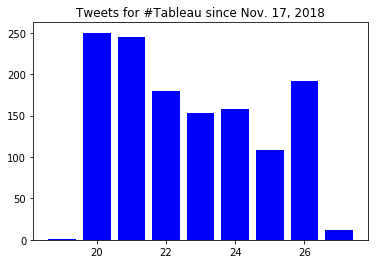

In [3]:
start_dt = datetime(2018, 11, 20)
tab = twitter.get_tweets_since('#Tableau', start_dt)
pbi = twitter.get_tweets_since('#PowerBI', start_dt)
tab['day'] = tab.apply(twitter.get_day, axis=1)
pbi['day'] = pbi.apply(twitter.get_day, axis=1)

In [188]:
def build_bar_chart(df, search_term, dt):
    xy = get_xy(df)
    plt.bar(xy[0], xy[1])
    plt.title('Tweets for {} since {}'.format(search_term, dt), color='white')
    plt.xlabel('Day', color='white')
    plt.ylabel('Tweet Count', color='white')
    plt.tick_params(axis='x', colors='white')
    plt.tick_params(axis='y', colors='white')
    plt.text(max(xy[0])-2, max(xy[1])-(max(xy[1])/10), 'Mean: ' + str(round(np.mean(xy[1]), 4)))
    plt.show()
    
def get_xy(df):
    data = df.groupby(by=['day'])['day'].count()
    data_dict = data.to_dict()
    x = list(data_dict.keys())
    y = list(data_dict.values())
    return x, y
    
def build_dual_bar_chart(df1, df2, search_term, dt):
    figure(num=None, figsize=(12, 6), dpi=80, facecolor='#1a2028', frameon=False)
    ax = plt.subplot()
    xy = get_xy(df1)
    xy2 = get_xy(df2)
    x2  = []
    for n in get_xy(df2)[0]:
        x2.append(n + .35)
    p1 = ax.bar(xy[0], xy[1], color = '#4c75a2', width = 0.35)
    rects = p1.patches
    for rect, label in zip(rects, xy[1]):
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width() / 2, height + 5, label,
                ha='center', va='bottom', color='#4c75a2')
        
    p2 = ax.bar(x2, xy2[1], color = '#e9c310', width = 0.35)
    rects = p2.patches
    for rect, label in zip(rects, xy2[1]):
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width() / 2, height + 5, label,
                ha='center', va='bottom', color='#e9c310')
        
    ax.set_facecolor('#1a2028')
    plt.title('Tweets for {} since {}'.format(search_term, dt), color='white')
    plt.xlabel('Day', color='white')
    plt.ylabel('Tweet Count', color='white')
    plt.tick_params(axis='x', colors='white')
    plt.tick_params(axis='y', colors='white')
    plt.xticks()
    plt.legend((p1[0], p2[0]), ('#Tableau', '#PowerBI'))
    #plt.text(max(xy[0])-2, max(xy[1])-(max(xy[1])/10), 'Mean: ' + str(round(np.mean(xy[1]), 4)))
    #plt.show()

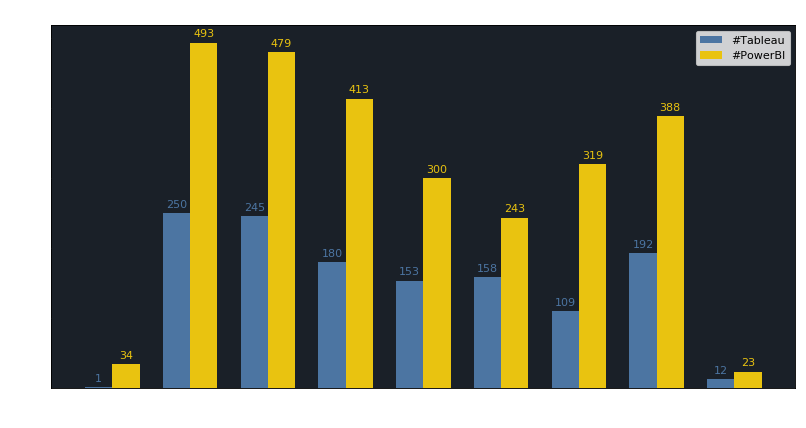

In [189]:
build_dual_bar_chart(tab, pbi, '#Tableau vs. #PowerBI', 'Nov. 20, 2018')

In [175]:
pbi

,created_at,favorited_count,geo,id,retweet_countplace,text,user,day
0,Tue Nov 27 01:32:22 +0000 2018,NaN,None,1067229614194520064,NaN,RT @PhilSeamark: A-Maze-ing DAX. My latest #DA...,"{'id': 1323782443, 'id_str': '1323782443', 'na...",27
1,Tue Nov 27 01:25:05 +0000 2018,NaN,None,1067227779584782336,NaN,RT @SearchSQLServer: Report Server platform pu...,"{'id': 316331833, 'id_str': '316331833', 'name...",27
2,Tue Nov 27 01:25:04 +0000 2018,NaN,None,1067227777328275456,NaN,RT @pqtraining: New blog post from @EscobarMig...,"{'id': 316331833, 'id_str': '316331833', 'name...",27
3,Tue Nov 27 01:20:33 +0000 2018,NaN,None,1067226638751055872,NaN,RT @Sk8Porti: Fua mucha info! Investigando #Io...,"{'id': 1000303340209823745, 'id_str': '1000303...",27
4,Tue Nov 27 01:20:00 +0000 2018,NaN,None,1067226502528466944,NaN,Report Server platform puts #PowerBI reports o...,"{'id': 67402074, 'id_str': '67402074', 'name':...",27
5,Tue Nov 27 01:14:00 +0000 2018,NaN,None,1067224990779678720,NaN,RT @Kjonge: new blog post: Determine columns y...,"{'id': 1005500691492802560, 'id_str': '1005500...",27
6,Tue Nov 27 01:13:39 +0000 2018,NaN,None,1067224902694952961,NaN,New blog post from @EscobarMiguel90 on extract...,"{'id': 3092291998, 'id_str': '3092291998', 'na...",27
7,Tue Nov 27 01:11:11 +0000 2018,NaN,None,1067224282076467200,NaN,RT @Kjonge: new blog post: Determine columns y...,"{'id': 3014597029, 'id_str': '3014597029', 'na...",27
8,Tue Nov 27 01:06:00 +0000 2018,NaN,None,1067222977551437824,NaN,Fua mucha info! Investigando #IotHub #Azure #p...,"{'id': 712246689696976897, 'id_str': '71224668...",27
9,Tue Nov 27 01:03:53 +0000 2018,NaN,None,1067222444786642944,NaN,RT @lapajne: So many new features in @ZebraBI ...,"{'id': 158804314, 'id_str': '158804314', 'name...",27
